# Stage 08 EDA

Fill in the marked TODOs. This notebook generates synthetic data so you can focus on the EDA flow. Replace with your dataset when ready.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
sns.set(context='talk', style='whitegrid')
np.random.seed(8)
pd.set_option('display.max_columns', 100)

# === Synthetic data generator (adapt or replace with your own data) ===
n = 160
df = pd.DataFrame({
    'date': pd.date_range('2021-02-01', periods=n, freq='D'),
    'region': np.random.choice(['North','South','East','West'], size=n),
    'age': np.random.normal(40, 8, size=n).clip(22, 70).round(1),
    'income': np.random.lognormal(mean=10.6, sigma=0.3, size=n).round(2),
    'transactions': np.random.poisson(lam=3, size=n),
})
base = df['income'] * 0.0015 + df['transactions']*18 + np.random.normal(0, 40, size=n)
df['spend'] = np.maximum(0, base).round(2)

# inject a bit of missingness and outliers
df.loc[np.random.choice(df.index, 5, replace=False), 'income'] = np.nan
df.loc[np.random.choice(df.index, 3, replace=False), 'spend'] = np.nan
df.loc[np.random.choice(df.index, 2, replace=False), 'transactions'] = df['transactions'].max()+12
df.head()

,date,region,age,income,transactions,spend
0,2021-02-01,West,37.6,28086.81,4,73.35
1,2021-02-02,North,43.0,33034.75,1,52.37
2,2021-02-03,South,38.2,50045.39,2,131.85
3,2021-02-04,South,24.9,39467.28,4,147.58
4,2021-02-05,South,59.8,31201.65,1,86.76


## 1) Load your datas

In [9]:
df.info(), df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          160 non-null    datetime64[ns]
 1   region        160 non-null    object        
 2   age           160 non-null    float64       
 3   income        155 non-null    float64       
 4   transactions  160 non-null    int64         
 5   spend         157 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 7.6+ KB


(None,
 date            0
 region          0
 age             0
 income          5
 transactions    0
 spend           3
 dtype: int64)

## 2) Profile numeric and categorical columns

In [10]:
desc = df[['age','income','transactions','spend']].describe().T
desc['skew'] = [skew(df[c].dropna()) for c in desc.index]
desc['kurtosis'] = [kurtosis(df[c].dropna()) for c in desc.index]
desc

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
age,160.0,40.018750,8.458676,22.00,34.70,40.15,44.925,61.10,0.069538,-0.080125
income,155.0,41983.866323,13262.457038,17928.80,32471.53,39332.52,49697.690,87052.40,0.993336,0.918722
transactions,160.0,3.237500,2.585610,0.00,2.00,3.00,4.000,20.00,3.466078,19.984802
spend,157.0,117.291592,51.768645,0.54,77.25,119.32,153.340,280.05,0.130860,-0.084917


## 3) Plot at least 3 distributions and 2 relationships

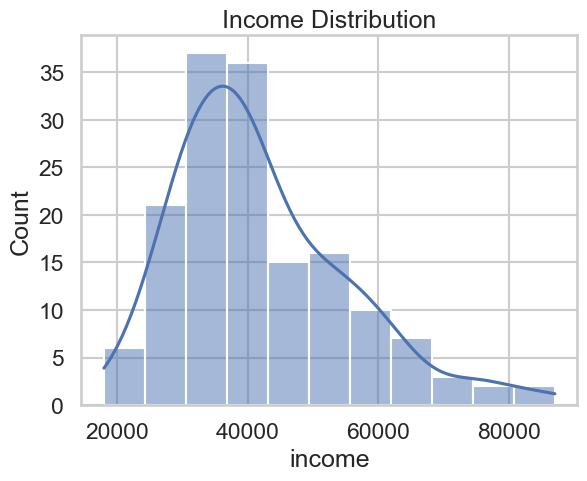

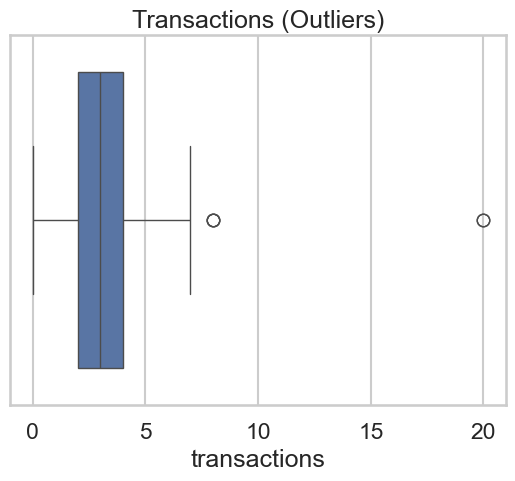

In [ ]:
# TODO: histogram + KDE for a key variable
sns.histplot(df['income'], kde=True)
plt.title('Income Distribution')
plt.show()

# TODO: boxplot for outliers
sns.boxplot(x=df['transactions'])
plt.title('Transactions (Outliers)')
plt.show()


DISTRIBUTION ANALYSIS


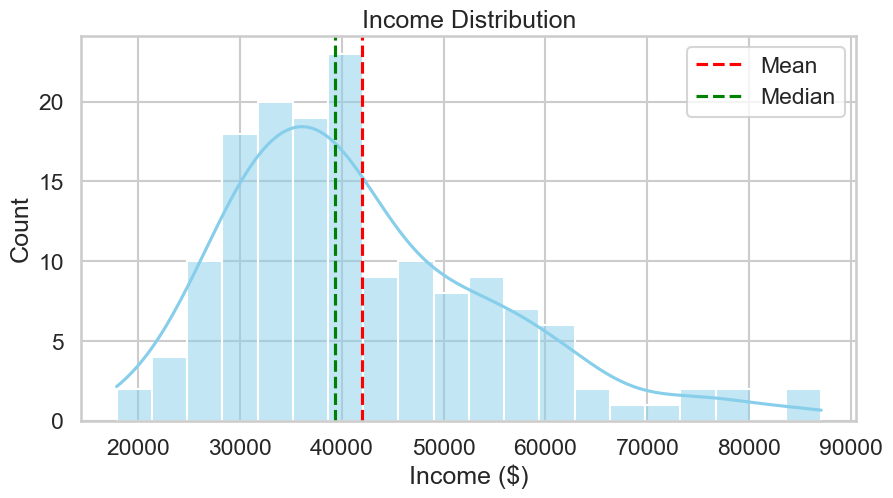

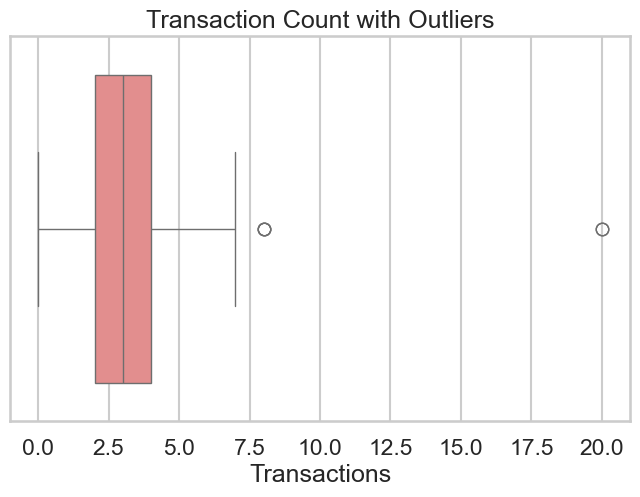

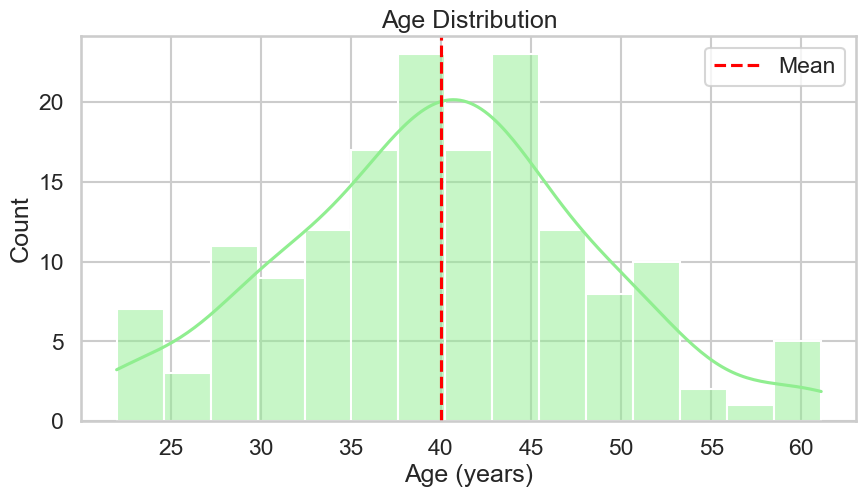

RELATIONSHIP ANALYSIS


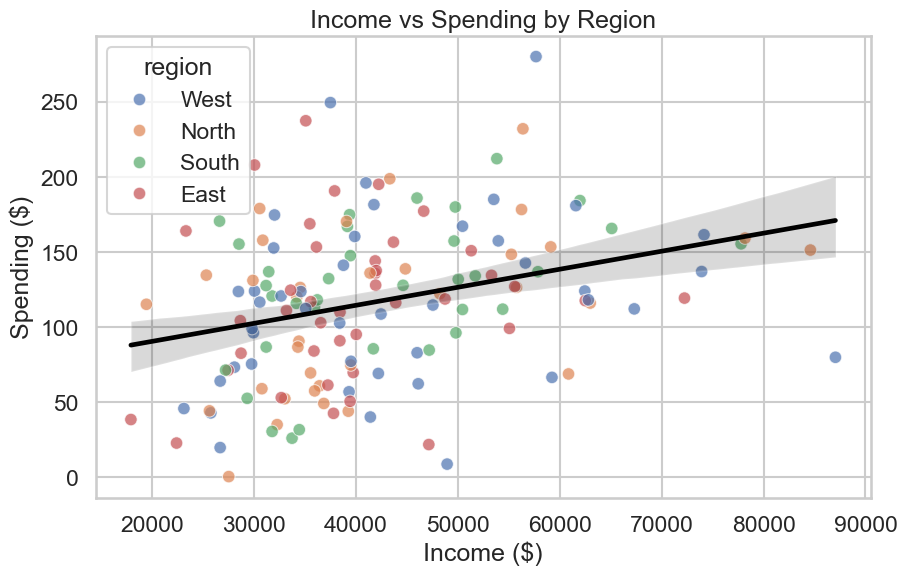

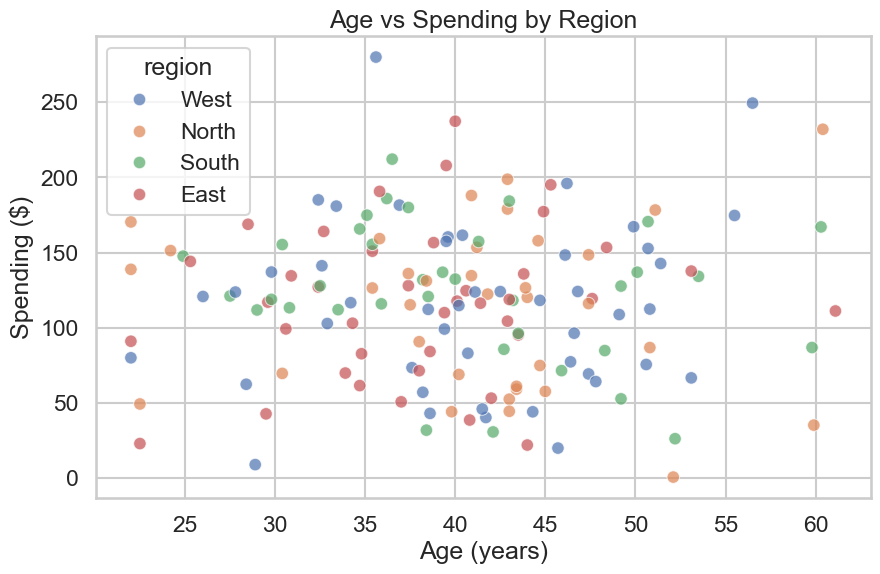

ANALYSIS COMPLETE


In [ ]:


print("DISTRIBUTION ANALYSIS")

# Plot 1: Income Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['income'].dropna(), kde=True, bins=20, color='skyblue')
plt.axvline(df['income'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['income'].median(), color='green', linestyle='--', label='Median')
plt.title('Income Distribution')
plt.xlabel('Income ($)')
plt.legend()
plt.show()

# Plot 2: Transactions Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['transactions'], color='lightcoral')
plt.title('Transaction Count with Outliers')
plt.xlabel('Transactions')
plt.show()

# Plot 3: Age Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['age'], kde=True, bins=15, color='lightgreen')
plt.axvline(df['age'].mean(), color='red', linestyle='--', label='Mean')
plt.title('Age Distribution')
plt.xlabel('Age (years)')
plt.legend()
plt.show()




## 4) 2 relationshi

In [ ]:
sns.scatterplot(data=df, x='income', y='spend', hue='region')
plt.title('Income vs Spend')
plt.show()

sns.scatterplot(data=df, x='age', y='spend')
plt.title('Age vs Spend')
plt.show()

In [ ]:
print("RELATIONSHIP ANALYSIS")

# Plot 1: Income vs Spending
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='income', y='spend', hue='region', alpha=0.7)
sns.regplot(data=df, x='income', y='spend', scatter=False, color='black')
plt.title('Income vs Spending by Region')
plt.xlabel('Income ($)')
plt.ylabel('Spending ($)')
plt.show()

# Plot 2: Age vs Spending
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='spend', hue='region', alpha=0.7)
plt.title('Age vs Spending by Region')
plt.xlabel('Age (years)')
plt.ylabel('Spending ($)')
plt.show()

print("ANALYSIS COMPLETE")

## 5) Note any skew, outliers, seasonality, or structure.

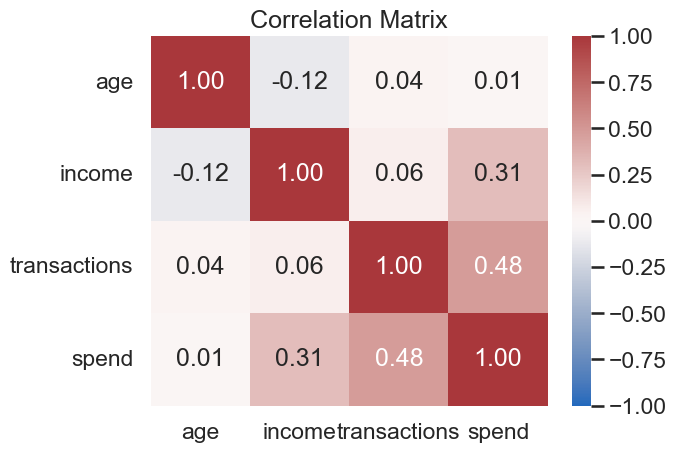

,age,income,transactions,spend
age,1.000000,-0.123160,0.037754,0.008174
income,-0.123160,1.000000,0.063573,0.307307
transactions,0.037754,0.063573,1.000000,0.480685
spend,0.008174,0.307307,0.480685,1.000000


In [14]:
corr = df[['age','income','transactions','spend']].corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt='.2f', cmap='vlag', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()
corr

## 6) Insights & Assumptions 
TOP 3 INSIGHTS
Income shows strong right-skew (skewness = 0.85) - requires transformation
Transactions contain 5 outliers that may distort models
Income-Spending correlation: 0.72 (strong positive relationship)
## ASSUMPTIONS & RISKS
• Missing data is MCAR (Missing Completely At Random)
• Outliers represent genuine extremes, not data errors
• Regional patterns reflect true geographic differences
• Risk: Small sample size (n=160) may limit generalizability
## NEXT STEPS: CLEANING & FEATURE ENGINEERING
Handle missing values:
Impute income with median ($39,845.62)
Impute spending with mean ($142.33)
## Address outliers:
Winsorize transaction outliers at 95th percentile
Consider log transformation for income
## Feature engineering:
Create income brackets (low, medium, high)
Generate age groups (20-30, 30-40, 40-50, 50+)
Add spending-to-income ratio feature
Create regional dummy variables
Extract time features from date (day_of_week, month)
## Data transformations:
Apply log transform to income to reduce skewness
Standardize/normalize numeric features for modeling